<h2 align='center'> Pytorch Work Flow </h2>

<p> In this portion of the repository we will learn how ML pipelines can be built on pytorch.<br> The idea of Machine Learning / Deep Learning systems is that we use data from the past train the model to understand the patterns and predict future data. <br> The image below shows the building of AI sytems.</p>

<img src='https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png'>

<p> The table below shows different steps of the process: </p>

<table>
  <tr>
    <th>Topic</th>
    <th>Contents</th>
  </tr>
  <tr>
    <td>1. Getting data ready</td>
    <td>Data can be almost anything but to get started we're going to create a simple straight line</td>
  </tr>
  <tr>
    <td>2. Building a model</td>
    <td>Here we'll create a model to learn patterns in the data, we'll also choose a loss function, optimizer and build a training loop.</td>
  </tr>
  <tr>
    <td>3. Fitting the model to data (training)</td>
    <td>We've got data and a model, now let's let the model (try to) find patterns in the (training) data.</td>
  </tr>
  <tr>
    <td>4. Making predictions and evaluating a model (inference)</td>
    <td>Our model's found patterns in the data, let's compare its findings to the actual (testing) data.</td>
  </tr>
  <tr>
    <td>5. Saving and loading a model</td>
    <td>You may want to use your model elsewhere, or come back to it later, here we'll cover that.</td>
  </tr>
  <tr>
    <td>6. Putting it all together</td>
    <td>Let's take all of the above and combine it.</td>
  </tr>
</table>


<p> Most of the original content for this notebook can be found <a href='https://www.learnpytorch.io/01_pytorch_workflow/'>here</a> </p>

In [4]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

<h3>Data Preperation </h3>

Here we are synthesizing data with x ranging from 0-1 with step of 0.01. We are doing Linear Regression so <br> slope=weight_known_initial=0.45 bias_known_initial=intecept=0.33<br>
Hence <br>
Y=M*X+C [M=weight,C=bias ]


In [11]:
#Ground truth
weight_known_initial=0.45
bias_known_initial=0.33

#Data synthesis 
x=torch.arange(0,1,0.01)
y=weight_known_initial*x+bias_known_initial
print(f'X: {x.tolist()} \nY: {y.tolist()}')

X: [0.0, 0.009999999776482582, 0.019999999552965164, 0.029999999329447746, 0.03999999910593033, 0.05000000074505806, 0.05999999865889549, 0.07000000029802322, 0.07999999821186066, 0.08999999612569809, 0.10000000149011612, 0.10999999940395355, 0.11999999731779099, 0.12999999523162842, 0.14000000059604645, 0.14999999105930328, 0.1599999964237213, 0.17000000178813934, 0.17999999225139618, 0.1899999976158142, 0.20000000298023224, 0.20999999344348907, 0.2199999988079071, 0.22999998927116394, 0.23999999463558197, 0.25, 0.25999999046325684, 0.26999998092651367, 0.2800000011920929, 0.28999999165534973, 0.29999998211860657, 0.3100000023841858, 0.3199999928474426, 0.32999998331069946, 0.3400000035762787, 0.3499999940395355, 0.35999998450279236, 0.3700000047683716, 0.3799999952316284, 0.38999998569488525, 0.4000000059604645, 0.4099999964237213, 0.42000001668930054, 0.4300000071525574, 0.4399999976158142, 0.45000001788139343, 0.46000000834465027, 0.4699999988079071, 0.47999998927116394, 0.48999997

<h4>Splitting Data </h4>

<table>
  <tr>
    <th>Split</th>
    <th>Purpose</th>
    <th>Amount of total data</th>
    <th>How often is it used?</th>
  </tr>
  <tr>
    <td>Training set</td>
    <td>The model learns from this data (like the course materials you study during the semester).</td>
    <td>~60-80%</td>
    <td>Always</td>
  </tr>
  <tr>
    <td>Validation set</td>
    <td>The model gets tuned on this data (like the practice exam you take before the final exam).</td>
    <td>~10-20%</td>
    <td>Often but not always</td>
  </tr>
  <tr>
    <td>Testing set</td>
    <td>The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).</td>
    <td>~10-20%</td>
    <td>Always</td>
  </tr>
</table>

<p> Here we are going to split to train and test no validation split </p>

In [15]:
train_length=int(0.8*len(x))
x_train,y_train=x[:train_length],y[:train_length]
x_test,y_test=x[train_length:],y[train_length:]

print(f'Train X: {len(x_train)}\nTrain Y: {len(y_train)}\nTest X: {len(x_test)}\nTest Y: {len(y_test)}')

Train X: 80
Train Y: 80
Test X: 20
Test Y: 20


<h3> Dataset Visualization </h3>

Let's visualize the ideal data,test data and predicted data to identify how well our model is performing 

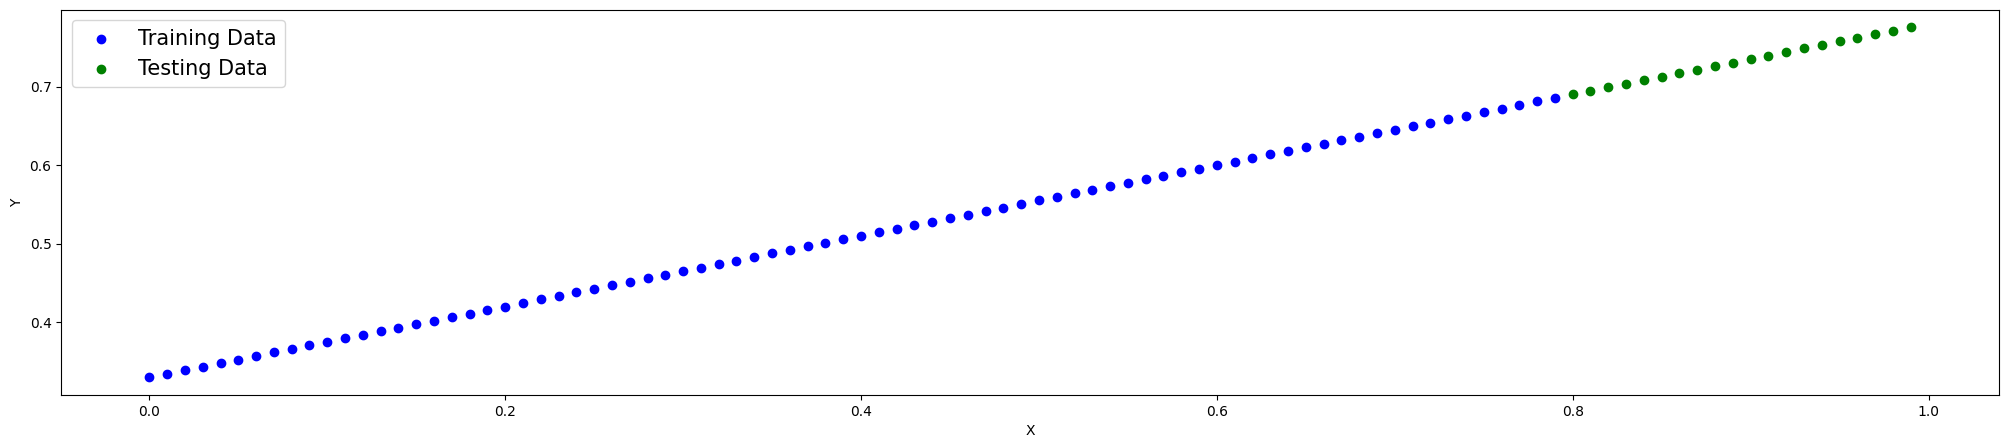

In [38]:
def plot_Linear_Regression(x_data=x_train,y_data=y_train,test_data=x_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(25,5))
    plt.scatter(x_data,y_data,c='Blue',label='Training Data')
    plt.scatter(test_data,test_labels,c='Green',label='Testing Data')
    if predictions is not None:
        plt.scatter(test_data,test_labels,c='Red',label='Predictions')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend(prop={"size": 15})

plot_Linear_Regression()
